### Ejercicio de Boston House Price

El grupo:
Elena, Mikel, Daniel, Rodrigo y Américo

### Step 1 importamos los paquetes

In [46]:
# Importamos todos los paquetes que vayamos a necesitar

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import folium # pip install folium PARA REPRESENTAR DATOS GEOREFERENCIADOS 
from folium import plugins
# import ipywidgets # pip install ipywidgets
import geocoder # pip install geocoder
# import geopy # pip install geopy
#import numpy as np
#import pandas as pd
from vega_datasets import data as vds # pip install vega_datasets 




In [47]:
#!pip install folium

### Step 2 tomaremos el fichero en (ruta)

In [48]:
data = pd.read_csv('./data/boston_house_prices.csv')

data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Step 3. Veamos los tipos de datos.

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [81]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [50]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Step 4. Cread un dataframe con la información de abajo

In [51]:
df_boston = pd.DataFrame(data)

df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Step 5. Buscad valores faltantes

In [52]:
#Buscar valores faltantes
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### Step 6 Eliminaremos aquellos datos faltantes

In [53]:
df_boston[~df_boston.isnull()] #como eliminar los valores faltantes si lo hubiera

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Step 7. Rellenad los datos faltantes con la media de la serie

In [67]:
import pandas as pd
import numpy as np 
#media de la serie 
df_boston.mean()


CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

<Axes: >

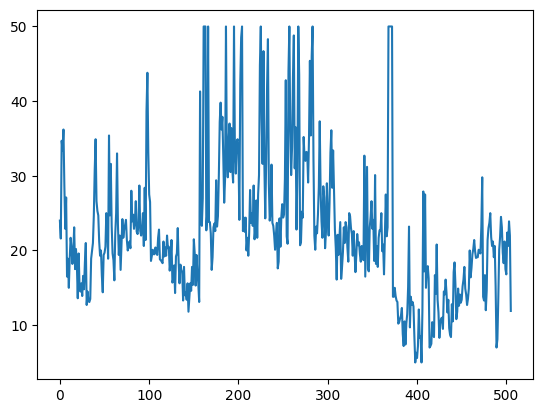

In [27]:
df_boston['PRICE'].plot()

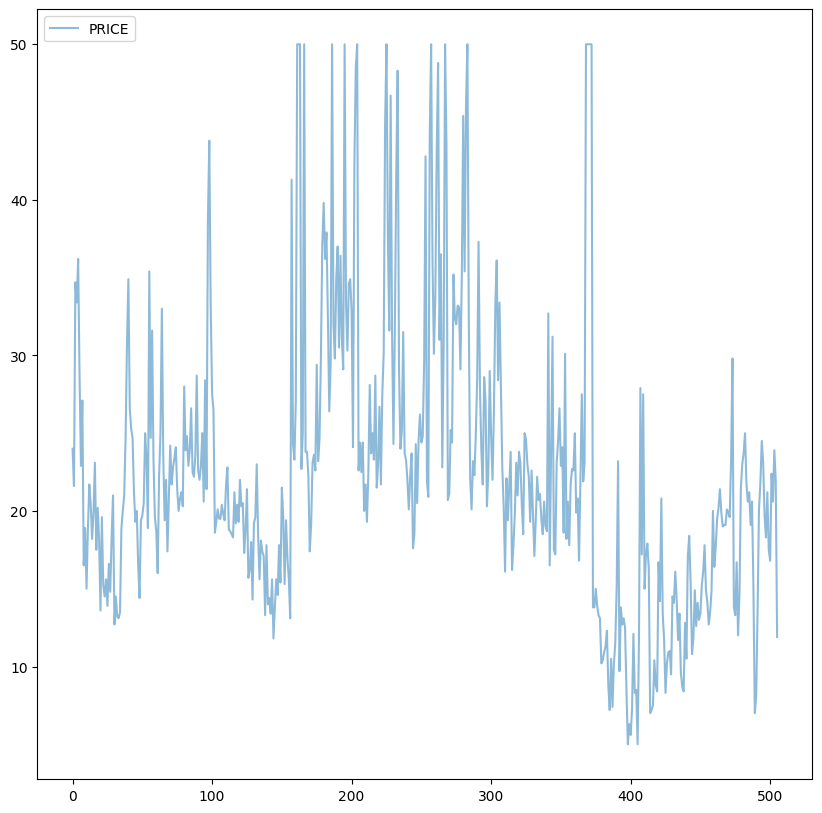

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
df_boston['PRICE'].plot(alpha=0.5, style='-')
plt.legend(['PRICE'],
           loc='upper left')

<Axes: >

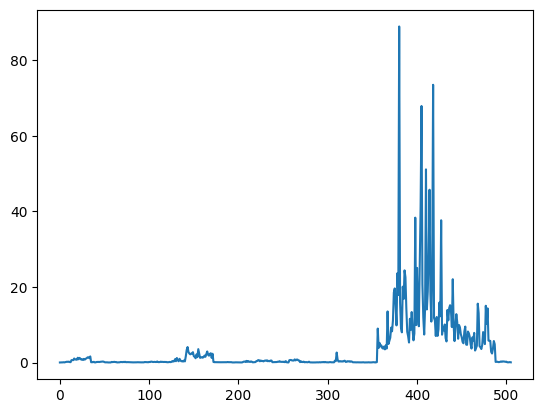

In [68]:
df_boston['CRIM'].plot()

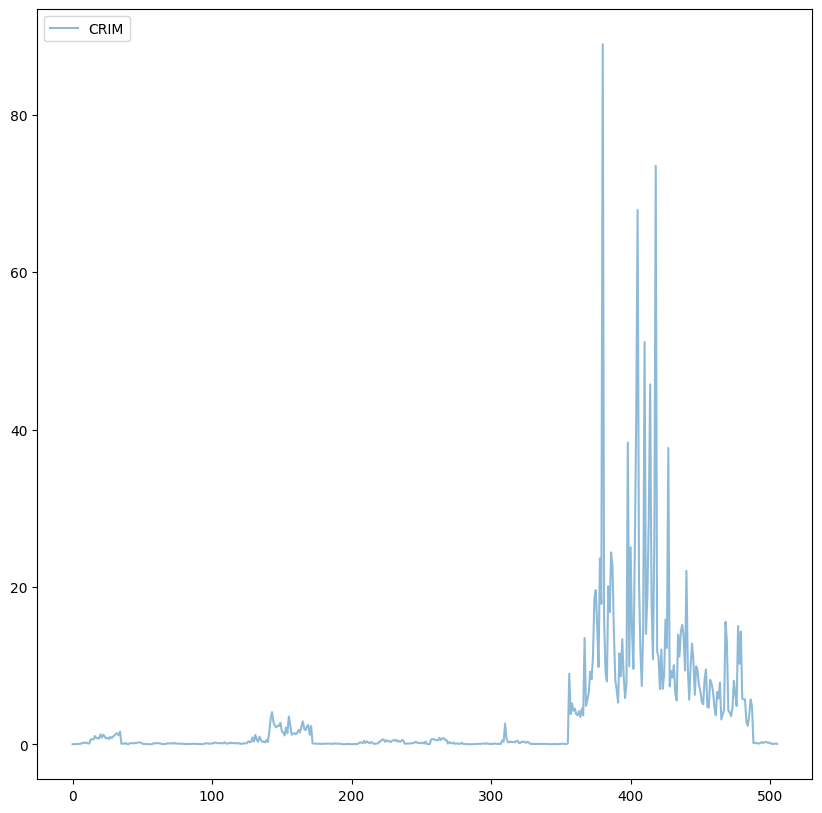

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
df_boston['CRIM'].plot(alpha=0.5, style='-')
plt.legend(['CRIM'],
           loc='upper left')

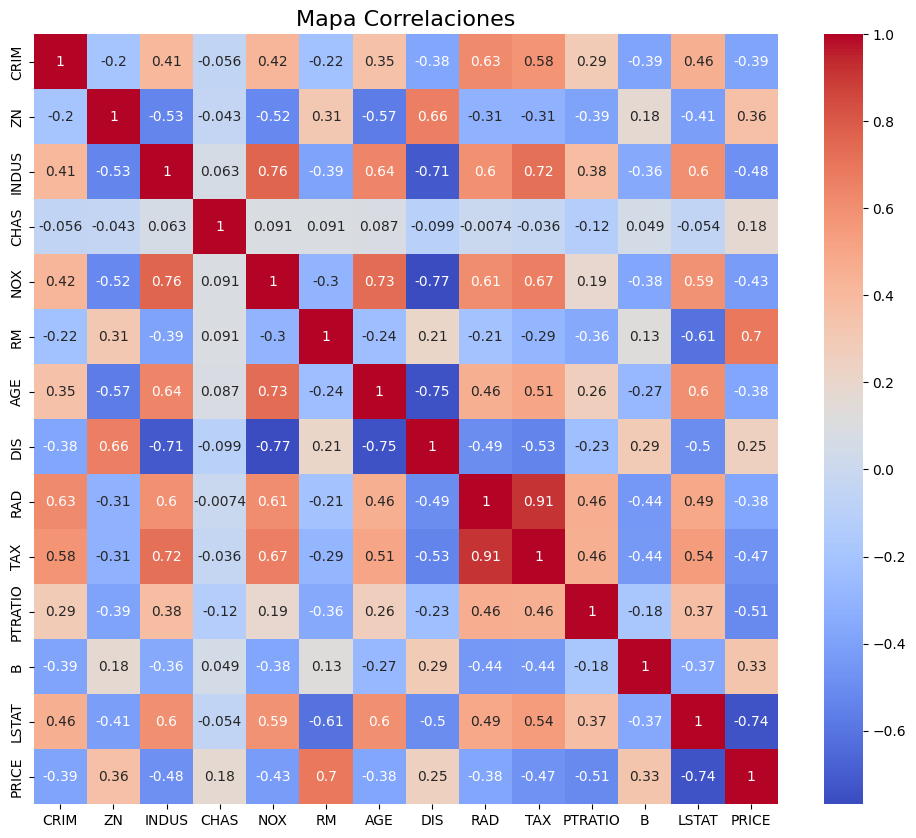

In [69]:
#vamos a mirar si hay correlacion entre los elementos del dataframe 
corre = df_boston.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corre, annot=True, cmap='coolwarm')
plt.title('Mapa Correlaciones', fontsize=16)
plt.show()

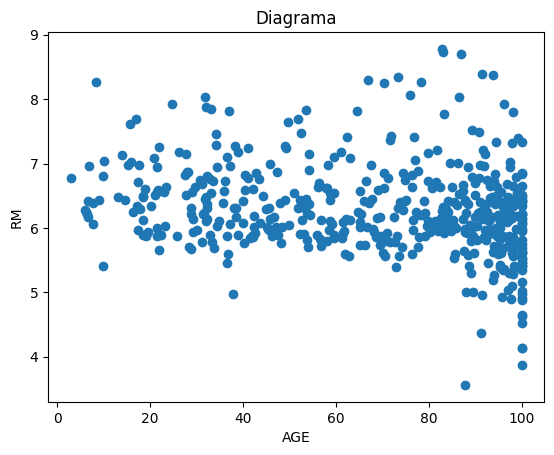

In [70]:
#miramos la relacion entre Age y Rm
import matplotlib.pyplot as plt
plt.scatter(df_boston['AGE'], df_boston['RM'])
plt.xlabel('AGE')
plt.ylabel('RM')
plt.title('Diagrama1')
plt.show()

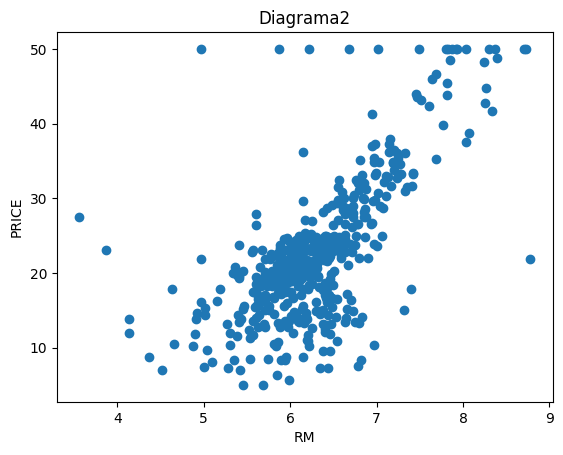

In [71]:
#miramos relacion entre Price y Rm
import matplotlib.pyplot as plt
plt.scatter(df_boston['RM'], df_boston['PRICE'])
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.title('Diagrama2')
plt.show()

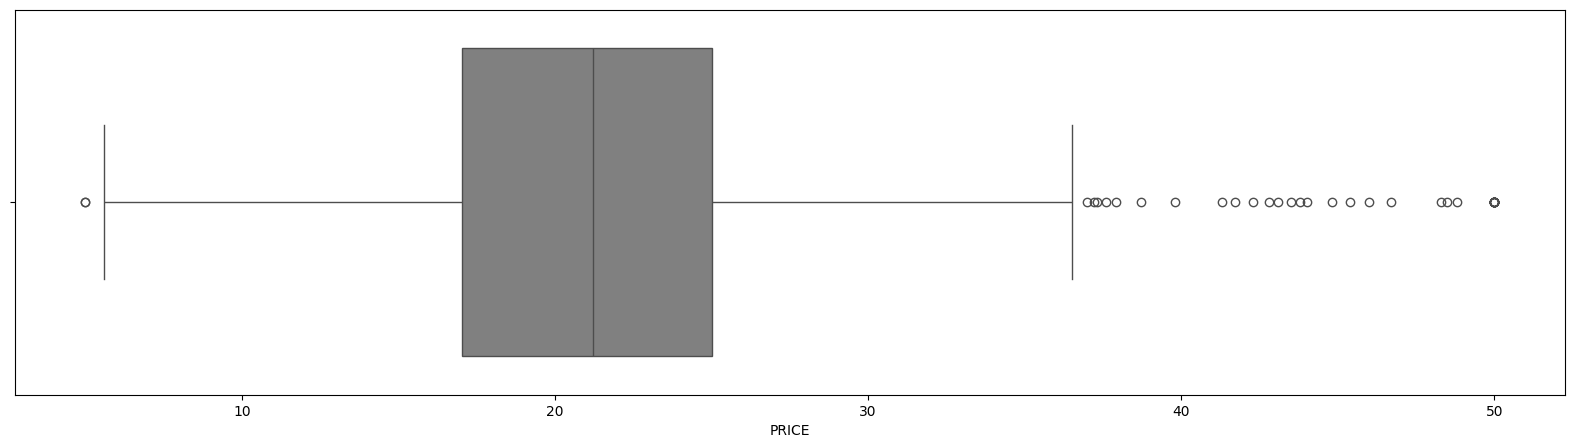

In [73]:
#distribucion de los precios de las casas de Boston
plt.figure(figsize=(20,5))
sns.boxplot(x=df_boston["PRICE"], color="grey");

<Axes: xlabel='PRICE', ylabel='Count'>

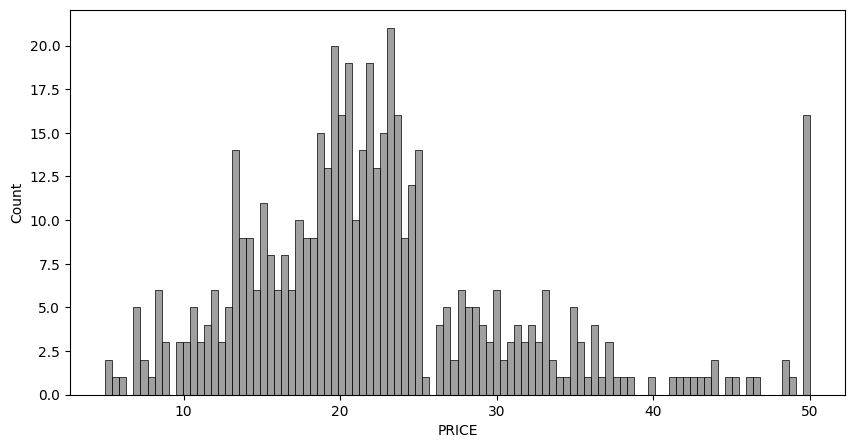

In [75]:
plt.figure(figsize=(10,5))
sns.histplot(df_boston["PRICE"],
             kde=False,
             color='grey',
             bins=100)

Valor del percentil 0: 5.0
Valor del percentil 25: 17.025
Valor del percentil 50: 21.2
Valor del percentil 75: 25.0
Valor del percentil 100: 50.0
media:


(None, 22.53)

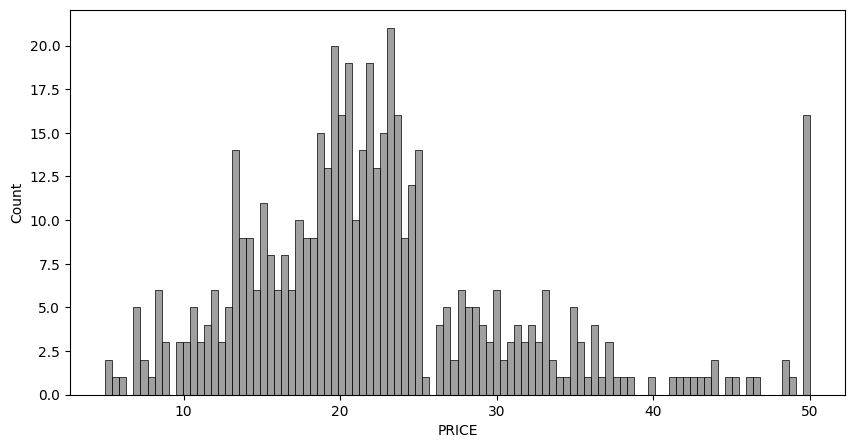

In [79]:
plt.figure(figsize=(10,5))
sns.histplot(df_boston["PRICE"],
             kde=False,
             color='grey',
             bins=100)
#mirar minimo #mirar maximo y mediana
p_0 = np.percentile(df_boston['PRICE'], 0) 
p_25 = np.percentile(df_boston['PRICE'], 25) 
p_50 = np.percentile(df_boston['PRICE'], 50) 
p_75 = np.percentile(df_boston['PRICE'], 75) 
p_100 = np.percentile(df_boston['PRICE'], 100) 

print("Valor del percentil 0:", p_0)
print("Valor del percentil 25:", p_25)
print("Valor del percentil 50:", p_50)
print("Valor del percentil 75:", p_75)
print("Valor del percentil 100:", p_100)
print("media:"), round(df_boston['PRICE'].mean(),2) 

In [80]:
#intentar localizar el mapa 
mapa = folium.Map(location=[42.361145, -71.057083],
                   zoom_start=12,width=700,
                  height=500,
                 control_scale=True)
mapa

In [82]:
#guardar el mapa 
mapa.save('mapa.html')